# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# **Importing Dataset**

In [ ]:
titanic_data = pd.read_csv('/content/tested.csv')

# **Analysing Data**

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_data.shape

(418, 12)

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
newdata = titanic_data.drop(columns = 'Cabin',axis =1)

In [ ]:
newdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
newdata['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

# **EDA**

<Axes: xlabel='Survived', ylabel='count'>

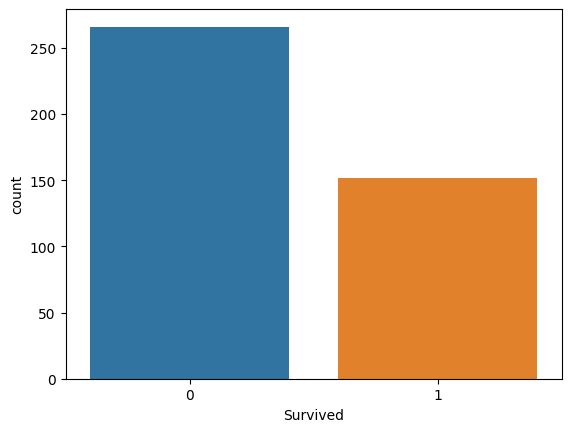

In [ ]:
sns.countplot(newdata,x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

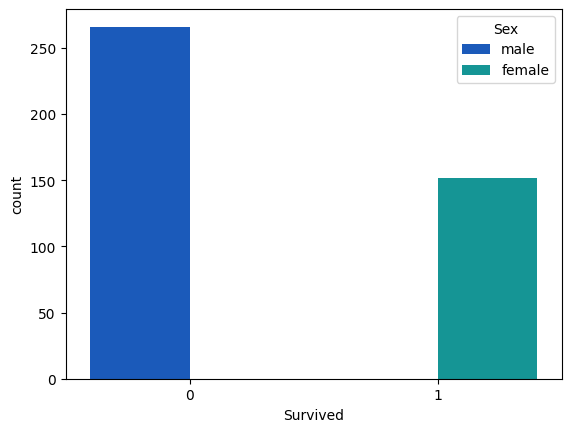

In [ ]:
sns.countplot(x='Survived',hue = 'Sex',data=newdata,palette='winter')

<Axes: xlabel='Survived', ylabel='count'>

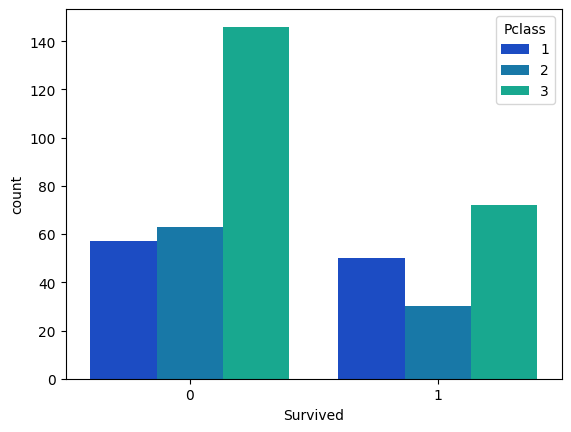

In [ ]:
sns.countplot(x='Survived',hue = 'Pclass',data=newdata,palette='winter')

<Axes: ylabel='Frequency'>

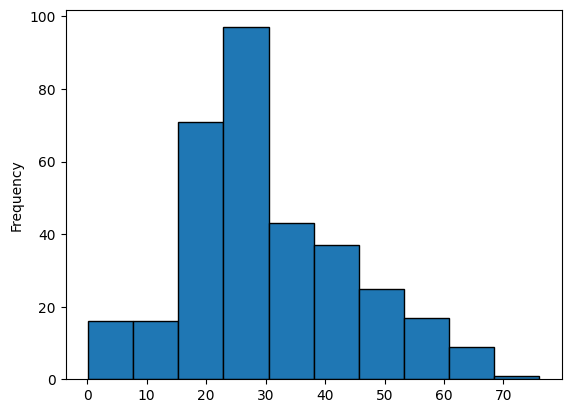

In [ ]:
newdata['Age'].plot.hist(bins =10,edgecolor='black')

<Axes: xlabel='SibSp', ylabel='count'>

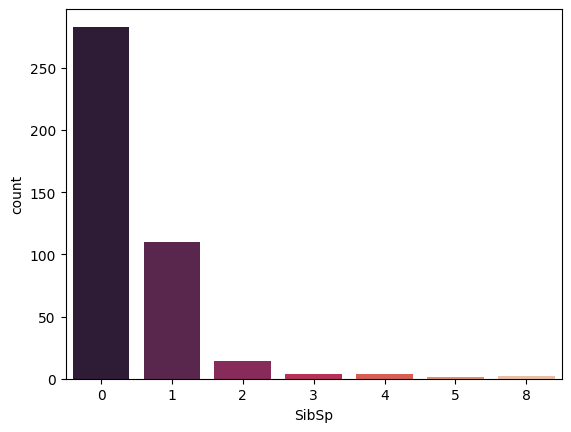

In [ ]:
sns.countplot(newdata,x='SibSp',palette='rocket')

<Axes: xlabel='Pclass', ylabel='Age'>

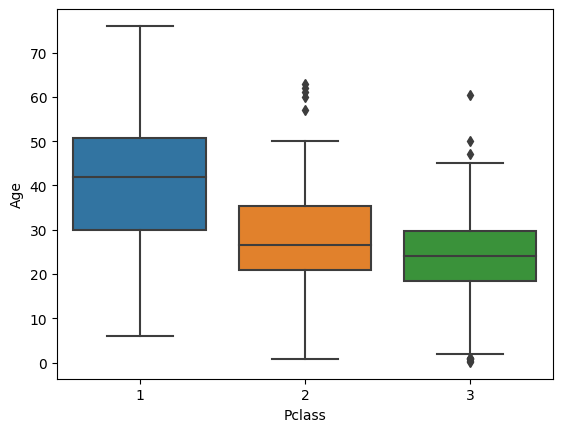

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=newdata)

<ipython-input-17-f258ffb067f0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(newdata.corr(), cmap='coolwarm', annot= True, fmt='.2f')


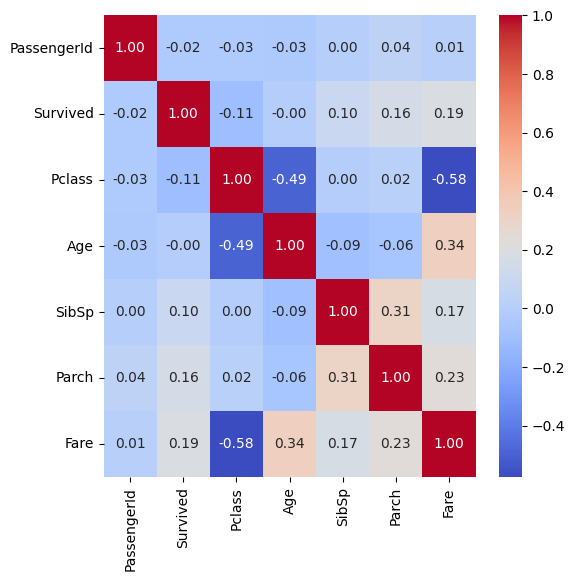

In [ ]:
#Correlation
plt.figure(figsize=(6,6))
sns.heatmap(newdata.corr(), cmap='coolwarm', annot= True, fmt='.2f')
plt.show()

# **Data Cleaning**

In [ ]:
newdata.drop(['PassengerId', 'Ticket','Name'],axis=1,inplace= True)

In [ ]:
pd.isnull(newdata).sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [ ]:
newdata.dropna(inplace=True)

In [ ]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  331 non-null    int64  
 1   Pclass    331 non-null    int64  
 2   Sex       331 non-null    object 
 3   Age       331 non-null    float64
 4   SibSp     331 non-null    int64  
 5   Parch     331 non-null    int64  
 6   Fare      331 non-null    float64
 7   Embarked  331 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 23.3+ KB


# **Data Preprocessing**

In [ ]:
X = newdata.iloc[:,:-1].values
Y = newdata.iloc[:,0].values

In [ ]:
print(X)

[[0 3 'male' ... 0 0 7.8292]
 [1 3 'female' ... 1 0 7.0]
 [0 2 'male' ... 0 0 9.6875]
 ...
 [1 3 'female' ... 0 0 7.775]
 [1 1 'female' ... 0 0 108.9]
 [0 3 'male' ... 0 0 7.25]]


In [ ]:
print(Y)

[0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0]


In [ ]:
newdata.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'Q':1,'C':2}},inplace=True)

In [ ]:
newdata

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,1
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,1
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
409,1,3,1,3.0,1,1,13.7750,0
411,1,1,1,37.0,1,0,90.0000,1
412,1,3,1,28.0,0,0,7.7750,0
414,1,1,1,39.0,0,0,108.9000,2


In [ ]:
X = newdata.iloc[:,:-1].values
Y = newdata.iloc[:,0].values

# **Splitting the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=5)

In [ ]:
print(X_train)

[[ 1.      3.      1.     ...  0.      0.      7.75  ]
 [ 0.      3.      0.     ...  0.      0.      7.7958]
 [ 0.      2.      0.     ...  1.      0.     26.    ]
 ...
 [ 0.      3.      0.     ...  0.      0.      8.05  ]
 [ 1.      2.      1.     ...  1.      1.     13.    ]
 [ 0.      3.      0.     ...  1.      0.     17.4   ]]


# **Training the Data**

In [ ]:
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier()
  knn.fit(X_train,Y_train)

KNeighborsClassifier()

# **Model Predictions**

In [36]:
from sklearn.metrics import classification_report

In [38]:
y_pred_knn = knn.predict(X_test)
print(classification_report(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        63
           1       0.61      0.54      0.57        37

    accuracy                           0.70       100
   macro avg       0.68      0.67      0.67       100
weighted avg       0.69      0.70      0.70       100



In [40]:
knn.predict([[0,2,30,1,0,11,2]])

array([1])